### Week 13: Time Series Analysis 

Time Series Forecasting

Time series forecasting occurs when you make scientific predictions based on historical time stamped data. 

It involves building models through historical analysis and using them to make observations and drive future strategic decision-making.

An important distinction in forecasting is that at the time of the work, the future outcome is completely unavailable and can only be estimated through careful analysis and evidence-based priors.

Types of models to use

​
ARIMA
moving average( PACF)

​
auto regressive and intergrated moving average ( ACF for moving average)

​
base line model 
you can check whether base line or ARIMA model is better 
​
Diference between machine learning and time series. 

Time series has to do with trends and seasons and it has just two few columns and it does not deal on dependent and independent variable.

import warnings
warnings.filterwarnings("ignore")

install the prediction on a list so as to test it

.
trends are patterns , we have upward and downward trend.

5 ,3-6 and you put it in a loop.

size dont have a bracket 
sampoo.size and shape are characterictics of the data,so they dont carry bracket

​
Sampoo.describe() is a function and you can manipulate it. 
​
We smoothen our time series using the moving average
​
it uses the rolling function to achieve it

​
for e.g you choose 5 windows, ti will find the average of the 5 and plot the average as the point so as to have a smoother time series.

​
shift () shift the index by desired number  using the base line model. base model is an initial model, when we now access other models we can now choose to accept it or reject it.

​
We concatinate ie combine 

​
THe drop any function is temporary, if you want it to be permament, you need to put inplace=True else if you run the code again ,it will return to the old code.

​
we now import the mean square metrics to calculate the error
​
We will implement the square root to give us our error

​
Auto regressive intergrated moving average (ARIMA)

​
ACF : Auto regression

​
PCAF  : Moving Average
intergrated 

p auto regression

d is the degree of differential

​
Moving average is the auto correllation
in a situation you dont know the pvalue to use , you can use a range 0-5 ,6-10 and you put it in a loop.

A baseline model is essentially a simple model that acts as a reference in a machine learning project.
Its main function is to contextualize the results of trained models. Baseline models usually lack complexity and may have little predictive power. Regardless, their inclusion is a necessity for many reasons

The CONCAT function combines the text from multiple ranges and/or strings, but it doesn't provide delimiter or IgnoreEmpty arguments. CONCAT replaces the CONCATENATE function. However, the CONCATENATE function will stay available for compatibility with earlier versions of Excel.



We will be looking at the new dataset for forecasting and analyzing it within the python.
we use pandas for the import of dataset
we use matplotlib.pyplot to plot the data
we use %matplotlib inline for graphiics like line chart within the command language.

The %matplotlib inline enables “inline plotting”, where plotted graphics appear in your notebook. Suppose we want to draw a simple line graph using the following code. The code works fine, but it doesn't show the line graph inline with the code

##### import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shampoo = pd.read_csv("C:\\Users\\user\\Downloads\\Shampoo.csv")

In [3]:
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
type(shampoo)

pandas.core.frame.DataFrame

How you can import a csv file as a time series dataset? To check your knowledge on data manipulation process.

first, we need to keep our index as month because once we do that, we can do a better manipulation of the data, lets say you want to saerch for only  month two , we first do month 1, 01 , month 2 ,02 and we continuue to th last month, but we can do a better manipulation if we have the months through the index.

we need to make suer this is going into series instead of data frame
so after passing the pd.file we include ,index_col=[0],parse_dates=True ( we are specifying that there is a date column and we want it to be a property, and then the imported  parameter which will convert it into the time series  squeeze=True, by default is false but i want it to be true
If you want to see all the parameters , just press shift+ tab tab

In [5]:
shampoo = pd.read_csv("C:\\Users\\user\\Downloads\\Shampoo.csv",index_col=[0],parse_dates=True,squeeze=True)

In [6]:
type(shampoo)

pandas.core.series.Series

Now it is pandas series instead of dataframe.

+ Interview question when you are importing dataframe how you can convert it to time series

+ Next, is how to plot the data

<AxesSubplot:xlabel='Month'>

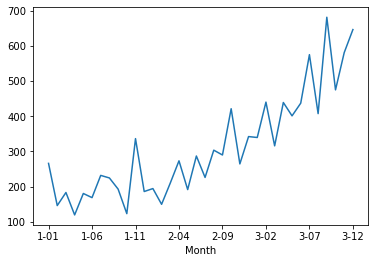

In [7]:
shampoo.plot()

is a clear variation that a trend is present.
You can as well decide to show just the lines with dot or circles use shampoo.plot(style = 'k.')
sometimes, the dot representation is an easier one an sometimes the line representation is. But here we didint specify the parameters

<AxesSubplot:xlabel='Month'>

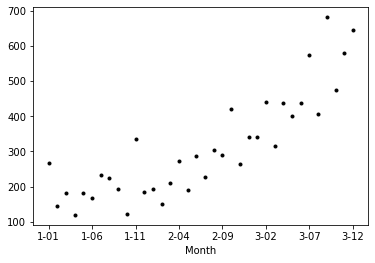

In [8]:
shampoo.plot(style = 'k.')

In [9]:
# To find out how many datpoints it has
shampoo.size

36

In [10]:
# use describe function to find out the statistics of the data point
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

describe () is a method but shamoo.size is a property

Interview Question
What is the difference betww\een mean and median?
mean is taking all the value and dividing by th ecount of value 
median is the middle value or 50% in an ordered list, first you need to put evert thing in an order, It should be an ordered list.

The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set. The median is the middle value when a data set is ordered from least to greatest. The mode is the number that occurs most often in a data set.

+ Interview question: In which scenario will you use mean or median


It’s best to use the mean to describe the center of a dataset when the distribution is mostly symmetrical and there are no outliers.

When the data are skewed, the median is more useful because the mean will be distorted by outliers.”

Both the mean and the median can be used to describe where the “center” of a dataset is located.

It’s best to use the mean when the distribution of the data values is symmetrical and there are no clear outliers.

It’s best to use the median when the the distribution of data values is skewed or when there are clear outliers.

Mode is the most distributed value in the column.
These are measures of central tendency in statistics.

Next is smothing of time series , which means calculating the moving average.

window = means how many days moving average do you want to use ,5 or 6 days moving average , here we will use 10

In [11]:
# Create a moving average
shampoo_ma = shampoo.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

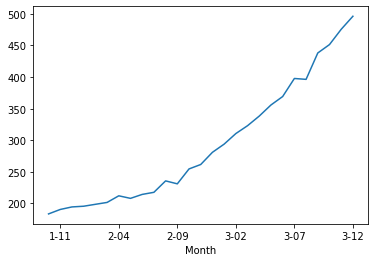

In [12]:
shampoo_ma.plot()

Some of the values have gone we used 10 , the values started from 10, 11, 12 ,13 etc.
This a very smooth as compared to the first one.
So if it is not very clear, you can use the moving average.

This is highly used in the stock market analysis and some business studies

+ Interview question : How can you create a moving average? 
what is the down side of having a large window side and what is standard window sidze to create

Next, we create a base line model
Interview qestion: what is a base line model or naive or starting model or initial model?
They are all command lines

This means defining your base line
It means below this , if there is any model just remove it.

The assumption behind it is that the previous value is the best reflector of the next value.

so for 266, 1-02 ie 2nd jan, the best predictor or reflector of the naive or base model is the previous value, so for second , it will be 266 , for 3rd jan ,it will be 145 and for 4th jan  it will be 183.1.

What it basically assumes is that the previous values are related to the current values.
What we have observed on the last day is going to reflect in the current ,even some more variation. with this assumption into the time series , we go ahead and create the naive or baseline

In [13]:
shampoo

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
1-06    168.5
1-07    231.8
1-08    224.5
1-09    192.8
1-10    122.9
1-11    336.5
1-12    185.9
2-01    194.3
2-02    149.5
2-03    210.1
2-04    273.3
2-05    191.4
2-06    287.0
2-07    226.0
2-08    303.6
2-09    289.9
2-10    421.6
2-11    264.5
2-12    342.3
3-01    339.7
3-02    440.4
3-03    315.9
3-04    439.3
3-05    401.3
3-06    437.4
3-07    575.5
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales, dtype: float64

To create the baseline, we will be using the shift method , this is because the shift method helps to shift the datapoint down
We will be using the concat method to do this , because we are not going to creat a seperate column all together rather we will contatinate ie to create a multiple dataset.

shampe,shamppp.shift(1) ,axis=1 , means to put the shift down by 1

In [14]:
shampoo_base = pd.concat([shampoo,shampoo.shift(1)],axis=1)

In [15]:
shampoo_base

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


The strcture of our naive or base line is created
Now we will need to remove the nan value because if we dont ,it will give an error when we evaluate the error matric but before that we will need to give a name to the two columns.

We will need to rename the columns

+ INTERVIEW QUESTION
How do you rename the column
data manipulation techniques

In [16]:
shampoo_base.columns

Index(['Sales', 'Sales'], dtype='object')

We wil be using the same methodology above, we will just specify the new names we got as output

In [18]:
#To rename the columns
shampoo_base.columns = ['Actual_sales', 'Forecast_sales']

In [19]:
shampoo_base.head()

,Actual_sales,Forecast_sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [20]:
#Drop the NaN value
# if you use this the NaN value will drop but when 
# you chech with shampp_base you will notice that the
# missing value have come back
#shampoo_base.dropna()

In [21]:
#shampoo_base

In [22]:
# So what you need so as to remove the NaN value parmanently is dropna(inplace =True)
# this saves your data
shampoo_base.dropna(inplace=True)

In [23]:
shampoo_base

,Actual_sales,Forecast_sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5
1-10,122.9,192.8


In [24]:

# check you can see it is not there again
shampoo_base.head()

,Actual_sales,Forecast_sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [32]:
#lets import the mean squared error metrics and 
# numpy maths for the calculation of error 
#between the actual and forecast sales
from sklearn.metrics import mean_squared_error
import numpy as np

###### Note ,the mean squared error simply gives us mean squared error,the problem here is that our error metrcs will give us the mean squared erroe and because it is squared we cannot interprete it, so to remove it we use np.sqrt , the squareroot method which will keep it in the form similar to the value we are working with or in the same matrix system in which this value is been calculated

In [33]:
shampoo_error = mean_squared_error(shampoo_base.Actual_sales,shampoo_base.Forecast_sales)

In [34]:
shampoo_error

11715.388285714285

The value 11715 is not in any where related to the matrix system the dataset we have follows, thus what we need is np.sqrt(shampoo_error) so as to be able to relate it with the dataset we have.

In [36]:
np.sqrt(shampoo_error)

108.23764726616282

We can create different types of mode , for example, we have 

+ Moving Average model

+ Auto regressive model

+ There is differencing you can do to make the series stationary

But at the end of the day most of the practitioners basically use the ARIMA method , which is 'AUTO REGRESSIVE INTERGRATED MOVING AVERAGE'

It is auto intensive
is intergrated 
it is moving average

All of thes is part of one single model

+ How to create Auto regressive model using ARIMA

All you need do is to specify the term or the parameter , for example you have 
ARIMA(p,d,q) , parameter p is auto regressive.

Lets say we have the model
ARIMA(0,0,2)

So you can create the ARIMA or the moving average or auto regressivr or  a combination of every thing.

Hence, we need to calculate the auto regressive and the moving average by having the ACF and the PACF.

Note, PACF is used to evaluate the parameter for p, which is auto regressive

ACF is for moving Average


In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

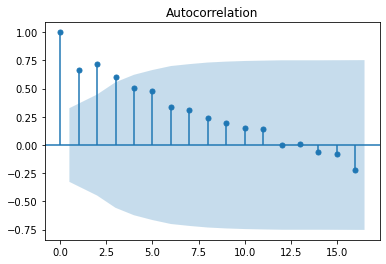

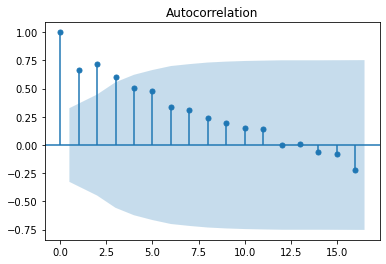

In [38]:
plot_acf(shampoo)

At the thumb we have 0, what it basically mean is that 266 = 266 = 0, what is the correlation between then? then the second one, 266 -- 145.9, what is the coerrelation between them .

It basically calculate the correlation between the one previous and the second previous and the third previous thumb and so on, from the 3rd previous turn, it shows that it is going below the range.
What value do you have out of this crritical range, you need to consider that.

In this case the q will be the 3 ie 0,1, 2, 3

We are simply differencing thumb d to make the series stationary, thumb d is usually between 0 - 2, so we will experiment it between 0-2, one may be sufficient but we can try it with 2.

Ths helps to remove the seasonality function so that we can do a better prediction

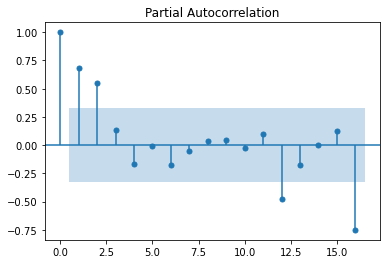

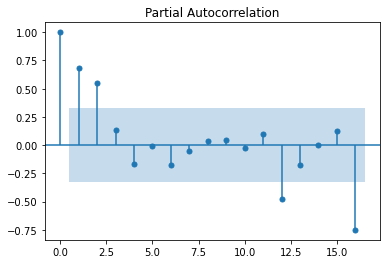

In [40]:
# Q -3 p-2, d - 0-2

plot_pacf(shampoo)

In [ ]:
Now ,we will input the ARIMA from the statsmodel

In [1]:
from statsmodels.tsa.arima_model import ARIMA

In [78]:
# WE need to trian and test our model
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]
# We have some data we keep for the calculation in the error matrix

In [46]:
import warnings
warnings.filterwarnings('ignore')
                       

In [72]:
# Create the ARIMA model using the train and test , the reason wy we create our train and test is that so that when we evaluate
#our model we will have some unseen data that ew  are keeping in the test ,for the calculation of error matrix which is the best practice.

shampoo_model = ARIMA(shampoo_train,order=(3,1,2))
#order is what we need to specify(2,1,3) we can type that first
# it didnt work we tried 3,1,3, it didnt then 3,1,2 and it worked , so you keep trying

In [73]:
# once model is created we need to fit it
shampoo_model_fit = shampoo_model.fit()

This result is based on ARIMA's dependency on the model creation and you fit the data , it basically gives a warning like in this case, whtaevr order we have created is not consistent, so generally in the case of Arima , we need to make sure we specify or experiment with a couple of orders to get the right fit

Alternatively, we can use model tunning to achieve the same result

In [74]:
# we use aic information to view how good the model is when you fit it
shampoo_model_fit.aic

272.3891948071348

In [75]:
# create the forecast to test the model
# o has residuals and couple of other things
shampoo_forecast = shampoo_model_fit.forecast(steps=11)[0]

In [79]:
# we have the observed values test_shampoo, then the forcast values shampoo_forecast
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

130.9271065518346

Here, 130 is the error rate that the ARIMA model contains and we need to test it against the base line model.
If it is better than the ARIMA we accept it otherwise ,we reject it.
Our baseline model error is 108 and the ARIMA model is 130, this shows that our baseline model is better than ARIMA model when it comes to doing the prediction

In [ ]:
# Using the parameter to specify

You need to choose a range you want to evaluate the p-value eg(0,5) the d-values(0-3) q_values (0,5)
This process may show alot of warnings so is important to import the warnings

In [81]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [85]:
# we need a loop to loop in this values
# Iterate it in the same order in which they go in the 
# order parameter of the arima method
# Store the prediction in a list so as to test it
# we need to loop through the number of time
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA%s MSE = %.2f'% (order,error))
                except:
                    continue

ARIMA(0, 0, 0) MSE = 77950.15
ARIMA(0, 0, 1) MSE = 70119.47
ARIMA(0, 0, 2) MSE = 58566.44
ARIMA(0, 0, 3) MSE = 62031.20
ARIMA(0, 1, 0) MSE = 33849.87
ARIMA(0, 1, 1) MSE = 40653.60
ARIMA(0, 1, 2) MSE = 34511.76
ARIMA(0, 1, 3) MSE = 41465.63
ARIMA(0, 1, 4) MSE = 14452.71
ARIMA(0, 2, 0) MSE = 34017.03
ARIMA(0, 2, 1) MSE = 28392.33
ARIMA(0, 2, 2) MSE = 24225.79
ARIMA(0, 2, 3) MSE = 23015.02
ARIMA(1, 0, 0) MSE = 61158.66
ARIMA(1, 0, 1) MSE = 46528.71
ARIMA(1, 0, 2) MSE = 43922.43
ARIMA(1, 0, 3) MSE = 34856.73
ARIMA(1, 0, 4) MSE = 25186.07
ARIMA(1, 1, 0) MSE = 31687.08
ARIMA(1, 1, 1) MSE = 42176.66
ARIMA(1, 2, 0) MSE = 18845.87
ARIMA(1, 2, 1) MSE = 26129.55
ARIMA(2, 0, 0) MSE = 45248.82
ARIMA(2, 0, 1) MSE = 29637.25
ARIMA(2, 0, 3) MSE = 43808.33
ARIMA(2, 0, 4) MSE = 22341.60
ARIMA(2, 1, 0) MSE = 35488.37
ARIMA(2, 1, 1) MSE = 39633.99
ARIMA(2, 1, 2) MSE = 35884.80
ARIMA(2, 2, 0) MSE = 34024.26
ARIMA(3, 0, 0) MSE = 46326.48
ARIMA(3, 1, 0) MSE = 22024.88
ARIMA(3, 1, 1) MSE = 22841.66
ARIMA(3, 1

In [ ]:
 QUESTION : PLs how did he do the calculation !!!!!

From the result, we can see that the baseline model is still better.

#### Time Series Analysis with Python 

In this tutorial, we are going to build a time series model using Python. First, let's import the
necessary libraries to perform our little time series analysis.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 15, 6

from datetime import datetime

Loading Time Series Data in Pandas

This tutorial draws from this one and we 
will be using this dataset which records the daily passenger
count for a certain airline company.

A cool thing with jupyter notebook is that you can run linux
command right here on the notebook simply by preceeding the command with the exclamation
sign !.

For instance, let's look at the first 10 rows of our dataset using the linux command head

In [2]:


! head AirPassengers.csv

Month,#Passengers

1949-01,112

1949-02,118

1949-03,132

1949-04,129

1949-05,121

1949-06,135

1949-07,148

1949-08,148

1949-09,136

See that the data is in csv format, with 2 columns. 

The first column is a string for the month in %Y-
%m format and the second column is the number of passengers. 

So here is a useful thing to know
when working with time series: converting strings to datetime.

The python datetime utility handles
this task using the strptime function. 

See Chris Albon's site for a quick guide. Now back to parsing
the data:

+ define a lambda function that converts a string with format %Y-%m to datetim
e

custom_date_parser = lambda dates: 

pd.datetime.strptime(dates, '%Y-%m')

#parse the data using pandas read_csv
AirPassengers =
pd.read_csv('AirPassengers.csv',
 parse_dates = ['Month'],
 index_col = 'Month',
 date_parser = custom_date_parser)
AirPassengers.head()

+ Let's see the data types

AirPassengers.dtypes

#Passengers int64

dtype: object

Let's walk through the parameters in the read_csv code above

• parse_dates tells pandas to parse the specified column as date. values can be
boolean or list of ints or names or list of lists or dict, and the default is False.

 index_col specifies which column to use as index. When analyzing Time Series in
Pandas, it's important that the variable containing the time information be used as
the dataFrame index. 

In the present case, this variable is called Month

• date_parser This specifies how to parse the date. By default, Pandas usses the
format ‘YYYY-MM-DD HH:MM:SS'. So if the date we want to parse are not in this
format, we need to define a custom parser, just like

the custom_date_parser above.

We see that the datatype of the Month is now datetime64[ns]
In [5]:
    
#Let's convert the dataFrame to a Series, since there is only one column anyw
ays

ts = AirPassengers['#Passengers']

ts.head()

Out[5]:

Month

1949-01-01 112

1949-02-01 118

1949-03-01 132

1949-04-01 129

1949-05-01 121

Name: #Passengers, dtype: int64


+ Check for Stationarity in Time Series

A Time Series is said to be stationary if it's desciptive statistical properties
such mean, variance remain constant in time. We can assume a series to be stationary if the
followings are true (more details here):
    
• constant mean

• constant variance

• an autocovariance that does not depend on time. 


But why should we care about stationarity? Well, most of the statistical methods used in the analysis
of time series assume that the series is stationary. In addition, having a stationay series has practical
advantage since it would mean that the average behavior of the series at time t will be the same at a
time in the future. Hence we can make predictions.
Let's test stationarity in the present data. First we create a simple plot

#visualize the time series with a simple line plot
ts.plot()
Out[6]:
<matplotlib.axes._subplots.AxesSubplot at 0x7f2ac3a2d828>

We see a clear trend and some seasonality. But it might always be easy to create a visual like this.
We can test stationarity using the following methods:
    
• Plotting Rolling Statistics: Plot the moving average or moving variance and see
if it varies with time. see pandas documentation for rolling

• Dickey-Fuller Test: This is one of the statistical tests for checking stationary.

The
null hypothesis H0H0 is defined as The Time Series is non-stationary. i.e. if
the p value is less than some confidence level αα (usually α=0.05α=0.05), we
reject the null hypothesis and say that the series is stationary

see here or thi post

In [22]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

 #Perform Dickey-Fuller test:
 print('Results of Dickey-Fuller Test:')
 dftest = adfuller(timeseries, autolag='AIC')
 
 dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag
s Used','Number of Observations Used'])
 for key,value in dftest[4].items():
 dfoutput['Critical Value (%s)'%key] = value
 print(dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:

Test Statistic 0.815369

p-value 0.991880

#Lags Used 13.000000

Number of Observations Used 130.000000

Critical Value (1%) -3.481682

Critical Value (5%) -2.884042

Critical Value (10%) -2.578770

dtype: float64

We may conclude that this is a non-stationary series because:

• The p-value is greater than the typical confidence level of 0.05, hence we donot
reject the null hypothesis

• The critical values from the Dickey-Fuller Test are way smaller than the Test
Statistics

+ Making a Time Series Stationary

There are a number of reasons why a time series might be non-stationary:

• Trends

• Seasonality

Hence the basic idea of forecasting with time series data is as follows

• Estimate trends and seasonalities and remove them to get a "stationary series".
This process is know as deseasonalization

• Make predictions using the stationary series. Calculate means etc ..

• Apply the deseasonalization contraints on the predicted value

+ Differencing

Differencing is a popular method to remove trend and seasonality in a time series. In python, this
can be achieved using the diff() method of either a series or a dataframe. Check out this post or this
one for an overview of performing differencing of time series.

More details about other methods of
differencing and when to use them can be found here

In [9]:

nonseasonal_diff = ts.diff(periods=1)

plt.plot(nonseasonal_diff)

plt.show()

test_stationarity(nonseasonal_diff.dropna(inplace=False))

Results of Dickey-Fuller Test:

Test Statistic -2.829267

p-value 0.054213

#Lags Used 12.000000

Number of Observations Used 130.000000

Critical Value (1%) -3.481682

Critical Value (5%) -2.884042

Critical Value (10%) -2.578770

dtype: float64

In [11]:

seasonal_diff = 

nonseasonal_diff.diff(periods=12)

plt.plot(seasonal_diff)

plt.show()

test_stationarity(seasonal_diff.dropna(inplace=False))

Results of Dickey-Fuller Test:
    
Test Statistic -1.559562e+01

p-value 1.856512e-28

#Lags Used 0.000000e+00

Number of Observations Used 1.300000e+02

Critical Value (1%) -3.481682e+00

Critical Value (5%) -2.884042e+00

Critical Value (10%) -2.578770e+00

dtype: float64

The Autocorrelation and Partial Autocorrelation plots

These plots help in identifying the order of an Autoregressive ARMA(p, q)
see also pandas visualization documentation for the autocorrelation_plot

In [12]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [13]:
lag_acf = acf(seasonal_diff.dropna(inplace=False), nlags=20)

lag_pacf = pacf(seasonal_diff.dropna(inplace=False), nlags=20, method='ols')

In [14]:
p=plot_acf(lag_acf)

def PlotAcf(data):
    
 fig, axes = plt.subplots(nrows=4, 
 
 figsize=(8, 12))
 
 fig.tight_layout()
 
 axes[0].plot(data)
 
 axes[0].set_title('Raw Data')
 
 axes[1].acorr(data, maxlags=data.size-1)
 
 axes[1].set_title('Matplotlib 
 Autocorrelation')
 
 plot_acf(data, lags=20, ax=axes[2])
 
 axes[2].set_title('Statsmodels Autocorrelation')
 pd.tools.plotting.autocorrelation_plot(data, ax=axes[3])
 
 axes[3].set_title('Pandas Autocorrelation')
 
 Remove some of the titles and labels that were automatically added
 
 #for ax in axes.flat:
 
 ax.set(title='', xlabel='')
 
 #plt.show()
 
In [17]:
#PlotAcf(ts_log_diff)

Forcasting: ARIMA

In [18]:
    
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

• Combined AR and MA

In [19]:

model = SARIMAX(ts, trend='n', order=

(0,1,0), seasonal_order=(1,1,1,12))

results_ARIMA = model.fit(disp=-1)

plt.plot(ts, label='original')

plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')

plt.title('RSS: %.4f'% 

sum((results_ARIMA.fittedvalues-ts)**2))

plt.legend()
Out[19
<matplotlib.legend.Legend at 0x7f2ab1a178d0>

df = pd.DataFrame(ts)

df['forecast'] = 

results_ARIMA.predict(start = '1959-05-

01', end= '1960-12-01

', dynamic= True)

df[['#Passengers', 

'forecast']].plot(figsize=(12, 8))

#plt.title('RMSE: %.4f'% 

np.sqrt(sum((predictions-

original_TS)**2)/len(origin
al_TS)))

Out[20]:

<matplotlib.axes._subplots.AxesSubplot at 0x7f2ab2827048

#predict(results_ARIMA.fittedvalues, ts)

+ Other Tutorials

• Sean Abu's Seaonal ARIMA with Python

In [ ]:
#### Times Series Analysis: Quiz

1. A restaurant has been experiencing higher sales during the weekends as compared to the weekdays. Daily restaurant sales patterns for this restaurant over a week are an example of the _seasonality________ component of time series

2.  Which of the following is not one of the four types of variation that is estimated in time-series analysis?

four types of variations estimated in time-series analysis are :-
1. Trend
2. Seasonal
3. Cyclical
4. Irregular


 3. The cyclical_________ component of a time series measures the fluctuations in a time series due to economic conditions of prosperity and recession with a duration of approximately 2 years or longer

In [ ]:
rend is a pattern in data that shows the movement of a series to relatively higher or lower values over a long period of time. In other words, a trend is observed when there is an increasing or decreasing slope in the time series. Trend usually happens for some time and then disappears, it does not repeat

Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.

In [ ]:
A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. The duration of these fluctuations is usually of at least 2 years. Think of business cycles which usually last several years, but where the length of the current cycle is unknown beforehand.14 Dec 2011

 4. Which term most closely relates to associative forecasting techniques?
 
 Associate techniques use predictor variables.


5. The number of daily births in a particular country hospital over a period of 10 days.
random pattern

6. The sales of a new popular ice-cream flavour in a beach resort. Choose the true statement.

seasonal

In [ ]:
7. This time series plot is an example of:
    
    irregular change

In [ ]:
8. cyclical variation

In [ ]:
9. a decreasing trend

In [ ]:
10. multiple trends

###  Weeek 13 Day 2 – Neural Networks Introduction

####  Introduction to neural networks

We will be setting our goals and introducing the frame work.

Creating a machine learning algorithm ultimately means building a model that outputs correct information,given that we have provided input data.

Think of the modeel as a black box, we feed input and it delivers an output.
For instance, we may want to create a model that will predict the weather tommorow given mediological information for the past few days, the input we feed to the model could be matrix such as temperature, humidity and precipitation, the output we will obtain wil be the weather forecast for tommorrow

Before we get confortable and confident  about the model's output ,we must train the model.
Training is an essential concept in machine learning as this is the process through which the model learns how to make sense of the input data.

Once , we have trained our model, we can simply fed it with data and obtain an output

The basic logic behind training an algorithm involves four incredients.

+ Data

+ Model

+ objective function which is to minimize the error 

+ Optimize the algorithm.

+ Data : we must employ a certain amount of data to train with. Usually,this is historical data which is readily available.

+ Model : 
We need a model, the simplest model we can train is a linear model.

In the weather forcast example, that will mean to find some coefficient, multiply each variable with them and sum up everything to get the output
Examplw W1(temperature) + W2(humidity) + W3(precipitation).

The linear model is just a tip of the eye bear.
Stepping on the linear model , deep machine learning helps us to create non complicated non linear models.

They usually fit the data much better than a simple linear relationship

+ Objective functon:

So far we took data, feed it ti the model and obtained an output.

We need this output to be as close to reality as possible and this is where the objective function comes in. 
It estimates how correct the models output are on average. the entire machine learning framework boils down to optimizing this function.

For example , if our function is measuring the prediction error of the model, be it worth to minimize this error or in othrwords, minimize the objective .

+ Optimization algorithm

It consists of the mecahnics to which we varies the parameters of the model to optimize the objective function.

For instance, if our weather forcast model is  weather tommorrwo equals W1 x temp. + W2 X humidty

The optimization algorithm may go through values like

1.05 X temp + 1.2 X humidty or 

1.05 X temp - 1.2 X humity or 

1.04 X temp - 1.19 X humidity and so on 

W1 and W2 are the parameters that will change.

For each set of parameters we will calculate the objective function, then we will choose the moel with the highest predictive power.

How do we know which one is the best?
It will be the one with the opti,al objective function.

WE used the word ingredients instead of process because the machine learning process is iterative(Continuous or repeatedly)

We feed data into the model and compare the accuracy through the objective function, then we vary the model's parameters and repeat the operation, when we reach a point after which we can no longer optimize or we don't need to , we will stop, since we woulld have found a good enough solution to our problem.


#### Training the model theory

We will be exploring the concept of training the model through the data.
 For example, you have a coffee making machine that doesn't know how to make coffee,
 
 In a non machine learning setting , we will need to incorporate the instructions in the machine's electronics.
For instance, the engineers may set the machines electronics too.
First, grind 20 grams of coffee beans, second heat the water to 200degrees farenhight, pour 10ml  grinded coffee into the cup.

In amachine learning setting, we will notexclusively provide instructions to the machine, instead we just need to state our goal.

In the coffee machine case , that will be a cup of coffee, then we will let the machine work out the problem on its own.
The machine learning process is a kind of 
trail and error training.
The machine will try various combinations of grinding, heating and pouring some of those will not make sense.

The machine wil try heating the water ,pouring it before grinding the coffee, resulting in a cup of hot water.
or may grind the coffee and pour the water without heating the water. after a thousans of tials and errors, the algorithmn will train itself to reach the set goal every time which is to make a cup of coffee .

It is possible that it will learn to make the best cofee you have ever tried much better than the one obtained by following a set of instructions. 
This is because it would have gone through so many more recipes than a human would ever be able to  do.

A reasonable optimization algorithmn  will not try all combinations,as there are usually inexhaustible many other options.

In the coffee example, if the coffee machine learns that grinding the coffee  has to go before pouring the water, it will not waste time attempting it in the wrong order
This example shows us why machine learning is so powerful, it allows systems to learn on there own situation
ww humans cannot define the original set of rules for the computer to follow, even if we can define the set of rules, an algorithm can probably provide a better one


Another exampl , is self driving cars, contrary to what many people think,self driivng cars don't follow rules such as a voice clip. Essentially, they train on hours on footage of real people while driving and learn how to mimick them efficiently.

It is not the set of rules they know but the final goal. The final goal fundamentally is to drive safe and efficiently. Avoid curves , dont bomb into other cars, dont go over the speed limit,stop in red lights and so on
.

Training Data is at the core of the process.

+ After trying the algorithm will learn 
+ why machine learning is so powerful is that it allows systems to learn on its own .

#### Types of Machine Learning

+ There are three major types of machine learning:

+ Supervised

+ Unsupervised

+ Reinforcement

supervised learning :

This refers to the case where we provide the algorithm with inputs and the corresponding desired output.
Base on this information , it learns ohw to produce output close to the ones we are looking for,

Those example, the one about the weather fircast and that of preparing coffee demonstrates supervised learning.


Unsupervised :-

Here we feed input but there are no target output. This means we dont tell the algorithm exactly what our goal is instead we ask it to provide dependence or underlining logic in the data provided.

For instance, imagine , we administer the website cancerdagos.com  , users have the option to submit photos of their cats or dogs to the website. once a photo has been submitted we will like it to be automatically classified in the cell page cat or the cell page dogs

In supervised learning , we will train the algorithm on a dataset of say 1000 cat photos and 1000 dog photos, each will be labbelled cat or dog. the model will then learn hpw to input pictures as cat or dog, minimizing mismatches over the trained set.

Sometimes however, we may not have the resources or the need to label the whole dataset.

In the previous dataset, there was a person who mnually labelled all 2000 pictures.

Now imagine a dataset of 2 million pictures , if it takes a person 5 seconds to label a picture, a dataset of 2 million observations will take around 2800 hours or 345 working days to label all pictures.


With unsupervised learning though we can 
train the algorithm without labelling the photos or in an unsupervised way.
we can simply  ask it to split them into two groups base on visual similarities
The result will be two groups thaat are unlabelled. once, we have obtained that,we can examine them and say oh,yes!
The first set is dogs and the second set is cat.
Thanks to algorithm

Unsupervised learning is especially useful 
when our goal is to split a  data into a certain number of categories whcih we do not prior to implementing it . This is called clustering.
.


+ Reinforcement learning :

With reinforcement learning ,we will train a model to act in an enviromnment base on the reward it receives
It is much like training your pet and rewarding it with a treats every time it achieves a goal. maybe to sit! or stand!

in thesame way the machine learning algorithm could be thought how to play super mario by rewarding it for progressing with an increase in score 

supervised learning  is the focus of the course and this is because it is the simplest and most commonly used.

Supervised learning can be divided into additional sub type:

Classification and regression
The difference is very trsight forward
Classification supervised learning provides output which are 
categorical such as cats and dogs

In regression supervised learning models 
The output will be of numerical type fr example predicting the eur/usd exchange rate will always give us a continuous number like 1.21 or 1.19


#### The Linear Model

Let's consider a variable X the function fof x gives us a variable y
f(x) -> y 
y is a function of X but we dont know this function.



We want to make the algorithm find that on its own.
This is done by providing it with many pairs of x and y as possible and following the methodologies to come

Let's start with the simplest model possible , the linear model. it is extremely important as it is the basis for more complicated models including non linear ones

y = f(x) 
In the linear model universe
f(x) = xw + b

x is the input we have , in the traditional statistical jog in we will call w the coefficint of x and b the intercept

In machine learning though 
w = weight(s) when we have more than one parameter.
b = bias or biases

There are many ways to define the linear model: 
wx + b
xw + b
x^Tw + b (t stands for transpose)
w^T x + b

It deosnt matter , we will keep the linear model simple and represent it in the following way.

xw + b
the goal of the machine learning algorithm is to find such values for W and B , so the output of :
xw + b

is as close to the observed values as possible.


Example: say our goal is to predict the price of an apartment,we may do that base on its size,so the input x , is the size, xw is the model we are using

The calculation of this expression gives us the price or the output y.

Let's inprt real values

The size of an apartment is 743sqft
,The possible model for predicting its price is

743 X 336.1 - 3237.51

input x = size

size = 743

weight =
336.1

b = -3237.51

If we calculate the output following this model for 743sqft apartment,we will obtain a price of $ 246,484.79

y = $ 246,484.79

Similarly, given an apartment of a different size, our model will predict a price of $332,862.49
say 1000ft X 336.1 - 3237.51 =  $332,862.49

+ Knowing the size of any apartment, we can get a prediction about the price based on the linear model.
Though this example may over simplify how things work in real life. This is just to show us the principle behind it.

#### The linear model. Multiple inputs

linear model multiple inputs:
What if we have
additional information saying that the apartment
we are valueing is located by the sea, the closer the apartment is to the beach,the higher the price.

+ Well a better linear model will predict the price based on both size and proximity to the beach.

The linear model tackling this issue is 
price of apartment equals its size X the weight of size + the appartment proximity to the beach X the weigth of proximity + the bias.

if we want to state this expresion 
in linear algebraic term, we can use the same frame work as before,
x times w plus b

y = xw + b

X and W are both vectors
X is 1 by 2 , W is 2 by 1
multiplying x and w , will give us a  scalars.
( 1x2 x 2x1 = 1x1) shape

let's continue our housing example
The output y = xw + b
x has 2 elements , a size of 743 and a distance from the beach of 1.21 miles
W has two elements too, one for each input.
the values are 403.77 and -15,212

and the bias is 1212.45

To calculate the new projected price, we must multiply

y = 743 X 403.77 -1.21 X 15,21+ 1212.45

     x1     w1      x2   w2         B
     
 =   $282,444.04
 
 similarly , if 1000sqft apartment is 2 miles away from the beach , its price becomes $ 373,958.45
 
 y = 1000 X 403.77 - 2 X 15,21+ 1212.45
 
 Notice that te weigth of the distance from the beach is negative. this is because we expect this variable to have a negative impact on our apartment price.

The greater the distance from the beach the lower the price

#### The linear model. Multiple inputs and multiple outputs

Multiple input and output:
    
Here is our new situation, we may be interested in knowing the price for buying the property but also price  for which we can rent it out.
Our input are unchanged, size and proximity to the beach

This time though we have two outputs, therefore, we can create two linear models.
The price as a function of the size and proximity to the beach and the 
rent as a function of the size and proximity to the beach.

Price = size x Weigth of size + proximity x weigth of proximity + bias

Rent = size x Weigth of size + proximity x weigth of proximity + bias


y1 = X1W11 + X2w21 + B1

y2 = X1W12 + X2W22 + B2

Notice the indices oof the weigth, the first number refers to the respective input and the second refers to the output

We have 2 outputs, 2 inputs, 4 weights and 2 bias.

There is a different weigth for each input in each equation.

Lets see this in linear algebraic terms
y = xw + B

In general , if we have k-imputs and m- outputs the number of weigths will be 
k x m.
The number of biases will be equal to the number of outputs - m.

Two outputs, 2 inputs, 4 weigths and 2 biases


Let the weight for price  W1 and W2 be equal to 403.77 and -15.512 as before and the weigth for the rent W11 and W12 be equal to 13.9 and -484.73

The biases B1B2 are 1,112.45 and 212.34

The inputs are same as before
743 and 1.21 miles

the first output 
y1 = 743 X 403.77 -1.21 X 15,21+ 1,112.45

= $ 282,444.04

The second output is found by :
y2 = 743 X 13.9 -1.21 X 484.75 + 212.34 = 
$9952.79.

Basically, you can buy the house around 282k and rent it out for 10k
This is how we use thesame model
XW + B =Y to represent linear relationship.

Notice , how the previous exampke is actually part of this one, here aree the respective output, input ,weight and bias.

Finally, is important to note that this was only one observation we could extend this example to many input, output and observation .

YN1 YN2 ....YNM = XN1 XN2 ...xNK * WK1 WK2 ...WKM + B1B2 ... BM 

The output matrix( will be B1B2 ... Bm where m is the number of output variables and n is number of observations 

The input matrix will be N by K , where K is the number of input variables

The weigth matrix (K X M)remains the same as the weigth dont change depending on the number of observations
the same applies to the biasses (1 X M).

This shows that we can feed as much data as we want to in our model, it will not change as each model is determined by the weigth and biases

This property will help us greatly when creating machine learning algorithms.

In machine learning, we vary only the weights and the biases but the logi of the model remains the same.

#### Graphical representation

We will be looking at two situations in which Machine learning and Neural network come in handy.

We may be wondering how our linear model will solve our cats and dogs problem.
Y = XW + B

It depends on the data.

We have a scatter plot of  a dataset consisting of animal photos.

Let the blue dots represents the dogs and the orange dots represent the cats.

A linear model or a straigth line can solve this problem easily.
Every thing below the line is one category and every thing above it is the other.

In this situation, we have a classification problem.

We are trying to classify the photos into dogs and cats.

Such a model is called the linear classifier.

This is because the data represented in the graph is linearly seperable.

What about in a case ,we have about 4 categories all twined together.

The data is non linearly seperable , therefore,we must use a non linear model. We will learn this under deep neural networks

In our apartment picture y = XW + B
A linear model represents the data well. this is the well known linear relationships.

However, different regresion problems may not necessarily be solved by a linear model.

#### The Objective function

Objective function is the third building block of the machine learning algorithm

This  is a measure used to  evaluate how well the model output match the desired  
correct values.

Objective funs=ctions are generally split into two types

+ loss or cost function

the lower the loss function the higher the level of accuracy of the model.
Most often we work with loss function.
An intuitive example is the loss function that 
measure the error of prediction.
We want to minimize the error of prediction thus minimize the loss

+ Reward functions:

They are basically the opposite of loss functions.

The higher the reward function the higher the level of accuracy of the model.
Usually reward functions are used in
reinforced learning where the goal is  to maximize the specific result. eg is the algorithm we mentioned earler , the one playing super mario, the score obtained by the algorithm for playing the game is the reward function.

Maximizing the final score will mean maximizing the reward function.

when dealing with surpervised learning we normally 
enconter loss function therefore we will be dealing mostly with loss function.

#### L2- norm Loss 

Earlier we divided supervised learning into two types:

+ Regression 
+ Classification


We will be discussing two of the most common type of loss function, each is used with two tyoes of machine learning

I.Categorical - Cross - entropy

Ii. Regression - L2 norm continuous number

Note that the objective function is a seperate block in our framework from the  model

This is to say that this lecture applies to all model regardless of this  linearity .

We will define another concept called the target denoted by T

The target is the desired value at which we are aiming.

Generally ,we want our output  to be as close as possible to the target T.

In the cats and dogs example we have been employing so far, the target will be the lebals we asign to each foyer, so we are 100 % sure that thses values are correct. They are the values we aspire to 

The y values are the output of our models. The machine learning algorithm aims to find a function of x that outputs values close to the target as possible using this new notation , the loss function evaluates the accuracy of the output regarding the target.

Looking at the two common function we talked about that are involed with loss function.

I .Regression 
Ii.Classification

+ Regresion : The output of a regression are a continuous number. a commonly used loss function is the squared loss also called the L2- Norm loss in  machine learning.
THe method for calculating it equals the 
least squared method used in statistics.
L2-norm ->  OLS(statistics)

Mathematically , it looks like this 
L2-norm = Σi (yi -ti)2 

Naturally,he lower the sum is ,
the lower the error of prediction, therefore  the lower the cost function(The loss)

"norm" comes from the fact it is the vector norm, or Euclidean distance of the outputs and the targets.

#### Cross-entropy loss

We discussed that the output of a 

regression is number( Numbers 1, 

10,1.21) but 

for classification things are different sinnce the outputs are categories like cats and dogs. we need a beter suited strategy.

The most common loss function used for classification is Cross-entropy loss, and it is defined as Lof y and t minus the sum of the target ,times the natural log of the output.

Cross-entropy = L(y,t) = - Σi t, in yi 

for exampl:
Let's consider our cats and dogs problem, we will introduce a 3rd category Horse

Cat       Dog        Horse

We have an image labelled as dog but how does it look in numerical terms.

The target vectoe t will be 

T = [ 0, 1  , 0]

The fiest zero means ti is not a cat, the second the 1 chosen is a Dog and the 3rd 0 means ,it is not a horse

Lets examine a different image

Cat     Dog         Horse

This time the target image is horse and is labelled 1,

Imagine , if the output of our model for the two images are  as follows;

After some machine learning transformations, this vectors show that the probability for each photo to be a cat ,a dog or a horse.

We wiil learn how to create this vectors later in the course, for now all we nee to know is how to inerprete them.

The first vector shows that according

to our algorithm, there is a 0.4 or a 

4o% chance that our first photo is a 

cat, 40% it is a dog and 20% ,it is a Horse.

The cross entropy of each photo

Cross-entropy = L(y,t) = - Σi t, inyi 

the cross entropy loss of the first 

image is -0 times 0.4 minus 1 times 

natural log of 0.4- 0 times natural log

of 0.2 = 0.92

L(y,t) = -0 x in 0.4 - 1 x in 0.4- 0 x

0.2 = 0.92


the cross entropy loss of the second 

image is -0 times 0.1 minus 0 times 

natural log of 0.2 -0 times natural log

of 0.7 = 0.36


L(y,t) = -0 x in 0.1 -0 x in 0.2 - 

1x0.7 = 0.36

As we already know the lower the loss function or the cross entropy in this case, the more accurate the model.

What is the meaning of this two cross entropies, They show that the second loss is lower , therefore its prediction is superior. 

The first image the model is not sure if it is a dog or a cat. There was an eqaul 40% probability for both assumptions.

We can oppose this with the second photo where the model was 70% sure it was a horse, thus the cross entropy was lower

An important note is that with classification our target vectors consists of a bunch of zeros and ones which indicates the correct categories ,therfore we can simplify the above formulas too. Minus the log of the probability  of the output for the correct answer
Here is how our initial formula will change

L(y,t) = -1 x in 0.4
  
L(y,t)  = -1 x in 0.7

Those were examples of commonly used loss functions for regression and classification problems . Most regression and classification problems are solved by using them but there are other loss functions that can help us solve our problems

+ WE must emphasize that any function that holds the basic property : 

+ Of being higher for worse results 

+ And lower for better results can be a loss function.

+ We will often use this observation when coding.
    

#### One-parameter gradient descent

We have learnt conceptually , how to input data into a model. We also measured how close to the target are the output we obtained through the objective function.
However,the actual optimization process happens when the optimization algorithm varies the model's pararmeter till the loss function has been minimized.

In the context of the linear model,this immplies
varying w and b.

The simplest and the most fundamental optimization algorithm is the "Gradient Descent"

The gradient is the multi -variance generallization of the derivative concept.

f'(X) -> ▽Fx(X1,X2,...,XN)

Let's consider a non machine learning example so as to understand the logic behind the gradient descent.
Here is a function of F of x equal to 3 x X2 plus 3 x X 
minus 4

f(X) = 5X^2 + 3X - 4

Goal: To find the minimum of this function using the gradient descent methodology.

Step 1:
Find the first derivative of the function in our case, it is 10 times x plus 3
f(X) = 10X + 3

Step 2:
Choose any arbitrary number
For example x non = 4
x non is the proper way to say x zero.
X0 = 4
then we calculate a different number X1 following the update rule
X1 =?

Xi plus 1 = Xi- eta times the first derivative of the function and xi

Xi+1 = Xi -ηf'(Xi)

X1 = 4 - η[10*4 +3] =

X1 = 4 - η43

η(eta) is the learning rate

It is the rate at which the machine learning algorithm forgets old believes for new ones.

We choose the learning rate for each case

Using the update rule , we can find X2 X3 and so on.

X2 = X1 -ηf'(X1)

X3 = X2 -ηf'(X2)

After conducting the updat operation long enough, the values will evantually stop updating.That is the point at which we know we have reached the minimum of the function.
This is because the first derivative of the fuction is 0 when we have reached the minimum.
So the first derivative :
Xi+1 = Xi -ηf'(Xi)

Will now become xi plus 1 = xi- 0 
or Xi plus 1 = xi

Xi + 1 = Xi-o 

or

Xi + 1 = Xi


Therefore, the update rule will no longer update.

+ Gradint descent function example:

Searching for the minimum of 5x^2+3x-4 
Update rule: Xi+1 = Xi -η*f'(Xi)
    
Let's take an eta of 0.01 , we start descending.
Learning rate η(eta) = 0.01

Around the 86th observation,ouer sequence doesnt change anymore, it is coverged to -0.30 , once the minimum is reached all subsequent values are equal to it.

Hence ,pur update rule has become 

Xi+1 = Xi - 0

Graphically ,gradent descent has an oval shape. we start from any arbitrary point and descend to the minimum.

The speed of minimization depends on the etta.

Let's try with an etta of 0.1, we hvave converged to the minimal of -0.3 after the first iteration. Now knowing the minimal is -0.3.

Lets check out an eta of 0.001, this step is so small that we need at least 900 iterations before we reached the desires value, we descend to the same extreme but in a much slower manner.

Finally, lets try with an eta of 0.2, we obtained a sequence of 4 and -4.6 until infinity.

No matter how many iterations we excute , our seqeunce will never raech -0.3, we already know -0.30 is the desired value, but if we didnt, we will be deceived.

This situation is called Oscilliation, we built around the minimum value but we never reach it.

We can use 4 or -4.6 in the algorithm but this will not be its true minimum.

Grapghically we are stuck into these 2 points.
Never reaching the minimum

Now that we have seen different learning rate and its performance,lets state this rule.

Generally, we want the learning rate to be high enough so that we can reach the closest minimum after repeating the operation in a rational amount of time.

So perhaps,0.001 was too small for this function.

At the same time, we want eta to be low enough so we are sure enough we reach the minimum , so we don't oscillate around the minimum.

Like in the case where we choose an eta of 0.2.

In deep learning, we will discuss a few smaller techniques that will allow us to chose the right rate

+ Key take aways

1. Using gradeint descent,we can find the minimum value of our function through a trial and error method.(that's just how computers think)

2. There is an updaterule tha allows us to chery -pick the trials so we can reach the minimum faster, Each consequent trial is better than the previous one with a nice update rule.

3. We must think about the learning rate which has to be high enough so we don't iterate forever but low enough so we don't oscillate forever.

4. Finally, once we have converged we should stop updating or as we see in the coding example we should break the loop.
One way to know we have converged is when the diffence between the terminal place i +1 and place 1 is 0.001

Xi+1 = Xi = 0.001

+ Download and look at the excel file available in the course resources. you can play around with the learning rate and arbitrary choose the number X9 and see what happens . this will give you a good intuition about the learning rate which is essential to teaching the algorithm.

#### N-parameter gradient descent

If we want to create working models that can be easily adapted to "Different problems", you must understand the drivers of a machine learning algorithm. This is why we have covered several theoritical steps. This is where the introductory part ends .
We will step on the 1 - Dimentional gradient descent concept and explain the concept (N- Dimentional) of the gradient descent used in machine learning.

In addition ,we will enploy what we have learnt about linear model and loss functons.

Let's consider the linear model we have studied so far

Xw + B = y  - > Model

Now each output can be represented using the linear model equation with the input which is just a corresponding xi

Xiw + B = yi ->  Single observation

Weigth and bias remain unchanged.

Using our apartment size example,yi will be the price of a single apartment, the corresponding xi will be information we have about the apartment.

743 X 336.1 - 3237.51 = 246.484.79

In essence, we are taking a single observation, Therefore the output yi is a scaler and it is equal to the corresponding xi x w plus the bias

Naturally , we are interested in the i of target ,so ti. This will be the target to which we will compare the output y 

model :Xiw + B = yi -> ti


Now, is time to pick the loss function we will use.

Usually,we denote the loss function with L and in bracket we put the output and the target as the loss function depends on this arguement.

L(y,t) -> loss

L is for loss but we can have C for cost
C(y,t) -> cost

And E for error and so on
E(y,t) -> error.

Depending on the frame work you are using, notations could differ though bearing thesame meaning.

Since, we have only discussed two types of loss function

+ L2-norm loss

+ Cross -entropy

Our choice will be limited to them

We will look into a regression example  using the l2-norm loss.

Loss: L(y,t) = L2-norm /2  = Σi (yi - ti)2 / 2

This is conventional 

This is because a division by the constant of two does not change the nature of the loss function as it is still lower for better predictions,. The machine learning algorithm will not be affected we emphasize this in the  objective function lecture.

" Any function that holds the basic property :

+ higher or worse results 

+ lower for better results 

Can be a loss function
Division by some constant changes nothing.
Make sure you know what the gradient(▽) is, unless you are working in the Multi dimensional space.

To perform the gradient descent we need old believes to be updated on each step.

#### Update Rule:

xi plus 1 = xi minus eta times the first derivative
Xi + 1 = xi-ηf'(xi)

becomes wi plus 1 = wi minus eta times the gradient of the loss function with wi for the weight

wi + 1 = wi - η▽wL(y,t)

bi plus 1 equals bi minus eta times the gradient of the loss function with respect to bi for the biases

bi + 1 = bi- η▽bL(y,t)

It is basically thesame but for a matrix w and a vector b instead of a number x

We want to minimize the loss function by varying the weight and the biases, which means we are trying to optimize the loss function regarding w and b

automatically it looks likes this

          wi + 1 = wi - η▽wL(y,t)
Optimization:
         bi + 1 = bi- η▽bL(y,t)
         
The gradient with respect to w of the loss function is equal to the sum of the gradient of 1/2 times (yi minus ti)2 with respect to w
 
 ▽wL= Σi▽w1/2(yi-ti)2 = 
 
 from the linear model yi= xi times w plus the bias where w and x are matrics and this is why we requrie both formating
    |
    xiw + b
so let's plot that in the formula:
so running the operation we obtain the sum of xi times yi minus ti
             
full derivation in
course notes         = ΣiXi (yi-ti) =
                     
                     = ΣiXiði

It is useful to combine yi minus ti into a new variable called delta  (ð ) .
delta is often used to measure differences.
This notion will come in handy when we start coding in python and when we  start dealing with dipper neural networks.

The final output becomes the sum of xi times delta i with respect to i,

▽wL=ΣiXiði

So we calculate that observation for each expression and then sum them all.

In  analogically the gradient of the loss function with respect to the bias  is the sum of delta i, notice that the 1/2 we introduced cancelled out the two we obtained when differentiating the square , that is why we included it to get a neater result.

▽wL=Σiði

Finally, lets go back to our Update rule,
We said that the generalized rule is wi plus 1 equals wi minus eta times the gradient of the loss function with respect to wi

wi + 1 = wi - η*▽l(wi)

Replacing the gradient with what we found here 

wi + 1 = wi - η*ΣiXiði


         wi + 1 = wi -η*ΣiXiði
         
Optimization:

         bi + 1 = bi- η Σiði


In anologically, the update rule for the biases is bi plus 1 equals b1 minus eta times the sum of delta i
  
     bi + 1 =  bi- η Σiði


This was the generalized gradient descent of a linear model, we can use it to minimize the cost function and train our model to enable it to produce valuable insight from our data

#### Required Reading: Neural Networks

+ Neural Networks

Perceptrons

The perceptron is a binary linear classifier that is only capable of predicting
classes of samples if those samples can be separated via a straight line. The
perceptron algorithm was introduced by Frank Rosenblatt in 1957. It
classifies samples using hand crafted features which represents information
about the samples, weighs the features on how important they are to the
final prediction and the resulting computation is compared against a
threshold value.

In the image above, X represents the inputs to the model and W represents
the weights (how important are individual features). A linear computation
of the weighted sum of features is carried out during the formula below:

Z = W0X0 + W1X1 + ...+ WmXm


The value of z is then passed through a step function to predict the class of
the sample. A step function is an instant transformation of a value from 0 to
1. What this means is that if z is greater than or equal to 0, its predicts one
class, else it predicts the other. The step function can be represented
mathematically as:

f(x) = {1  if w .x+ b > 0
        
       {0  otherwise

At each iteration, the predicted class gets compared to the actual class and
the weights gets updated if the prediction was wrong else it is left
unchanged in the case of a correct prediction. Updates of weights continue
until all samples are correctly predicted, at which point we can say that the
perceptron classifier has found a linear decision boundary that perfectly
separates all samples into two mutually exclusive classes.


During training the weights are updated by adding a small value to the
original weights. The amount added is determined by the perceptron
learning rule. The weight update process can be experienced
mathematically as shown below.


Wj := wj + Δwj


The amount by which weights are updated is given by the perceptron
learning rule below.


Δwj = η(y^(i)-ŷ^(i)) x^(i)j

The first coefficient on the right hand side of the equation is called the
learning rate and acts as a scaling factor to increase or decrease the extent
of the update.

The intuitive understanding of the above equation is that with
each pass through the training set, the weights of misclassified examples are
nudged in the correct direction so that the value of z can be such that the
step function correctly classifies the sample. 

It should be noted that the perceptron learning algorithm described is severely limited as it can only
learn simple functions that have a clear linear boundary. The perceptron is
almost never used in practice but served as an integral building block
during the earlier development of artificial neural networks.


Modern iterations are known as multi-layer perceptrons. Multi-layer
perceptrons are feed forward neural networks that have several nodes in the
structure of a perceptron. However, there are important differences. A
multilayer perceptron is made up of multiple layers of neurons stacked to
form a network. The activation functions used are non-linear unlike the
perceptron model that uses a step function. Nonlinear activations are
capable of capturing more interesting representations of data and as such do
not require input data to be linearly separable. The other important
difference is that multi-layer perceptrons are trained using a different kind
of algorithm called backpropagation which enables training across multiple
layer

+ Backpropagation

Backpropagation is an algorithm technique that is used to solve the issue of
credit assignment in artificial neural networks. What that means is that it is
used to determine how much an input’s features and weights contribute to
the final output of the model. Unlike the perceptron learning rule,
backpropagation is used to calculate the gradients, which tell us how much
a change in the parameters of the model affects the final output. The
gradients are used to train the model by using them as an error signal to
indicate to the model how far off its predictions are from the ground truth.
The backpropagation algorithm can be thought of as the chain rule of
derivatives applied across layers.

Let us look at a full fledged illustration of a multi-layer perceptron to
understand things further.

In the diagram , we have 

inputs-> input layer -> Hidden layer-> output layer -> outputs

The network above is made up of three layers, the input layer which are the
features fed into the network, the hidden layer which is so called because
we cannot observe what goes on inside and the output layer, through which
we get the prediction of the model. 

During training, in order to calculate by
how each node contributes to the final prediction and adjust them
accordingly to yield a higher accuracy across samples, we need to change
the weights using the backpropagation algorithm. It is the weights that are
learned during the training process hence they are sometimes referred to as
the learnable parameters of the model. To visually understand what goes on
during backpropagation, lets us look at the image of a single node below.

In the node above x and y are the input features while f is the nonlinear
activation function. During training computations are calculated in a
forward fashion from the inputs, across the hidden layers, all the way to the
output. This is known as the forward pass denoted by green arrows in the
image. The prediction of the model is then compared to the ground truth
and the error is propagated backwards. This is known as the backward pass
and assigns the amount by which every node is responsible for the
computed error through the backpropagation algorithm. It is depicted with
red arrows in the image above. This process continues until the model finds
a set of weights that captures the underlying data representation and
correctly predicts majority of samples.


+ How to run the Neural Network using TensorFlow

For our hands on example, we would do image classification using the
MNIST handwritten digits database which contains pictures of handwritten
digits ranging from 0 to 9 in black and white. The task is to train a neural
network that given an input digit image, it can predict the class of the
number contained therein.

+ How to get our data

TensorFlow includes several preloaded datasets which we can use to learn
or test out our ideas during experimentation. The MNIST database is one of
such cleaned up datasets that is simple and easy to understand. Each data
point is a black and white image with only one color channel. Each pixel in
the image denotes the brightness of that point with 0 indicating black and
255 white. The numbers range from 0 to 255 for 784 points in a 28 × 28
grid.

Let’s go ahead and load the data from TensorFlow along with importing
other relevant libraries.


In [ ]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Let us use the matplotlib library to display an image to see what it looks
like by running the following lines of code.

In [ ]:
plt.imshow(np.reshape(mnist.train.images[8], [28, 28]), cmap='gray')
plt.show()

The displayed image is a handwritten digit of number 9.

How to train and test the data

In order to train an artificial neural network model on our data, we first
need to define the parameters that describe the computation graph such as
number of neurons in each hidden layer, number of hidden layers, input
size, number of output classes etc. Each image in the dataset is 28 by 28
pixels therefore, the input shape is 784 which is 28 × 28.

+ Parameters

learning_rate = 0.1

num_steps = 500

batch_size = 128

display_step = 100

In [ ]:
# Network Parameters
n_hidden_1 = 10 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes]

We then declare weights and biases which are trainable parameters and
initialise them randomly to very small values. The declarations are stored in
a Python dictionary.


In [ ]:
# Store layers weight & bias
weights = {
 'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
 'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
 'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
    }
biases = {
 'b1': tf.Variable(tf.random_normal([n_hidden_1])),
 'b2': tf.Variable(tf.random_normal([n_hidden_2])),
 'out': tf.Variable(tf.random_normal([num_classes]))
}

We are would then describe a 3-layer neural network with 10 units in the
output for each of the class digits and define the model by creating a
function which forward propagates the inputs through the layers. Note that
we are still describing all these operations on the computation grap

In [ ]:
# Create model
def neural_net(x):
 # Hidden fully connected layer with 10 neurons

In [ ]:
 layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
 # Hidden fully connected layer with 10 neurons
 layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
 # Output fully connected layer with a neuron for each class
 out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
 return out_layer

Next we call our function, define the loss objective, choose the optimizer
that would be used to train the model and initialise all variables.

In [ ]:
# Construct model
logits = neural_net(X)
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
 logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Finally, we create a session, supply images in batches to the model for
training and print the loss and accuracy for each mini-batch.


In [ ]:
# Start training
with tf.Session() as sess:


In [ ]:
 # Run the initializer
 sess.run(init)

In [ ]:
for step in range(1, num_steps+1):
 batch_x, batch_y = mnist.train.next_batch(batch_size)
 # Run optimization op (backprop)
 sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
 if step % display_step == 0 or step == 1:
 # Calculate batch loss and accuracy
 loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
 Y: batch_y})
    
 print("Step " + str(step) + ", Minibatch Loss= " + \
 "{:.4f}".format(loss) + ", Training Accuracy= " + \
 "{:.3f}".format(acc))

 print("Optimization Finished!")
    
    
 # Calculate accuracy for MNIST test images
 print("Testing Accuracy:", \
 sess.run(accuracy, feed_dict={X: mnist.test.images,
 Y: mnist.test.labels}))

The session was created using with , so it automatically closes after
executing. This is the recommended way of running a session as we would
not need to manually close it. Below is the output

The loss drops to 0.4863 after training for 500 steps and we achieve an
accuracy of 85% on the test set.
Here is the code in full:
    
    # Parameters

In [ ]:
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

In [ ]:
# Network Parameters
n_hidden_1 = 10 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])


In [ ]:
# Store layers weight & bias
weights = {
 'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
 'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
 'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
 'b1': tf.Variable(tf.random_normal([n_hidden_1])),
 'b2': tf.Variable(tf.random_normal([n_hidden_2])),
 'out': tf.Variable(tf.random_normal([num_classes]))
}


In [ ]:
# Create model
def neural_net(x):
 # Hidden fully connected layer with 10 neurons
 layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
 # Hidden fully connected layer with 10 neurons
 layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
 # Output fully connected layer with a neuron for each class
 out_layer = tf.matmul(layer_2, weights['out']) + biases['out']

In [ ]:
 return out_layer

# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
 logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
with tf.Session() as sess:
 # Run the initializer
 sess.run(init)

In [ ]:
 for step in range(1, num_steps+1):
 batch_x, batch_y = mnist.train.next_batch(batch_size)
 # Run optimization op (backprop)
 sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
 if step % display_step == 0 or step == 1:
 # Calculate batch loss and accuracy
 loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
 Y: batch_y})
 print("Step " + str(step) + ", Minibatch Loss= " + \
 "{:.4f}".format(loss) + ", Training Accuracy= " + \
 "{:.3f}".format(acc))

In [ ]:
print("Optimization Finished!")
 # Calculate accuracy for MNIST test images
 print("Testing Accuracy:", \
 sess.run(accuracy, feed_dict={X: mnist.test.images,
 Y: mnist.test.labels}))

feed compare  optimization   - gradient descent

is a derivative concept

it means finding the smallest number or the minimum number. once it gets to the minimun the gradient stops . -0.3 is the desired minimum

you start from any point and descend to the minmal

f'(x) = 10x + 3
x0 
n(eta) = learning rate

generally we want the learning rate to be high

find the gradient descent using trial and error method

x

N- parameter gradient descent


N-Dimentional

xw + b = y
model: xi w + b = yi -> ti

ti = target

two types of loss function

optimization algorithm

tunning 

The learning rate is one of the parameters very 
important in training neural network

the learning rate is an optimization tuning parameter..

back propagation is an algorithm used to to determine input features.
can be thought of as the chain rule derivaties applied accross layers 

it worked with chain room derivative.

The library is a soft ware that you can use across a range of task

tensoflow is used for training neural network.

In [ ]:
#!pip install -q git+https://github.com/tensorflow/examples.git

Tensowflow is very important for neural networkimport MNIST data 
it is used for training models
various image processing sysytems

Tensowflow is designed for training neural network models

### Week 13 day 2 : MInimal Examples

#### Outline

#### Simple linera Regression minimal example

+ We will be creating our first machine learning algorithm.
We will build the model and we will feed it with input.
What we expect from the algorithm is to learn the underlying relationship about the data.

Here is how we are going to approach the problem.

+ First we will import the necessary libraries from python for the problem at hand.

+Second, we will generate random data to train them. We have decided to make this example with random data as we running the code will always yield different inputs , however,the model will remain the same.In this way ,you can see the same methodology applied for a potentially infinite number of dataset as this simple examples is the basis for more sophisticated machine learning algorithms.
It is more important to see how it works and prove that it works and acquire dep insight.
we wil leave the wao effect for a bit later when we will deal with deep learning.

+ Third , we will create the targets, these are the correct values,in our apartment example they will be the actual prices properties have. Essentially ,we will use fixed targets to be sure there is a linear relationship. In this way , when we train the algorithm we will be certain about the dependence it has to learn.
That is a god way to prove that the optimization is actually working. We know where we want to get by creating fake targets which we would like the algorithm to figure on its ownm if he does that then we can be certain it works .

+ Fourth, we will plot the training data so we can visually see it . This is the preparation phase of the lesson.

In the second part, we will define the variables we need.

+ fifth, we must create weigths.

+ sixth, Create biases.

+ seveth,Set a learning rate.

At the end, we will conclude with an actual regression.

Along the way, each line of code will be explained to make sure that everything is understood.

The relevant python libraries are numpy and matplotlib.pyplot .

Generally, numpy contains all the mathematical operations you will need.
Moreover, it is extremely fast and because of this two reasons it is heavily used in data science.

Matplot lib is a library used for plotting data. it provides a nice interface and requires very few arguement. it is helpful when plotting data.It creates nice graphs

finally, we will import the mpl_toolkits.mplot3d as it provides us with the ability to create nice 3d graphs.

This is the tool we will use to visualize the operations we are carrying out.

pyplot and mplot 3d are not essential for themachine learning algorithm, the will just provide us wtih good looking plots of our data.

This will provide us with an intuition about what is going on there.
Any how , numpy is sufficient in bringing a nice algorithm on its own

#### Generating the data (optional)

WE will be genrating the data we will train on. This step is now part of the machine learning algorithm. Essentially, we will create a fake data with a linear realtionship. Once again we will do that to prove that the methodology is working.

In real life, we will normally load the data from some external source.

+ Generating the data:

1.Declare a variable called observations
This variable willcontain the size of the data set  we want o generate.
Let's work with 1000 observations
You can do the same with 100,000 or 10 million if you like.
Note, that this choice will affect the speed of the algorithm.

You can play around with the number  of observations , you can try 100,000 or 10 million if you like. But be careful as 10 milion may cause computers to feeze!

We will create a two variable linear model called x and z
f(x,z) = a*x + b* z + c

Let's work on the inputs
We will use the numpy method np.random.uniform(low,high,size)draw a random value from a specified interval  (low,high),where each number has an equal chance to be selected.
This method requires three arguement:

i. The lowest point of the interval

ii. The highest point of the interval

Iii.The size(shape)

The size is actually the shape we want to generate the data, lets choose an interval from -10 to 10( you can play around with these numbers for homework.


According to our theorem , the appropraite size is the number of observations by the number of variables.

so observations by 1 as we are only talking about one varaible x.

We will generate the z's in the same manner

size =  n            x         k
     number of                 number of 
     observations              variables
     
These are the two input variables we will feed to the algorithm   .

Lets combine them in one matrix called inputs, As the theorem suggested, the input matrix should be of shape, the number of observations by the number of variables or 1000 x 2

From the linear model 
inputs = n x 1 = 1000 x 2

The appropriate method to use is np column stack , it literally stacks the observations into a matrix. This results in a matrix 1000 by 2

np.column_stack(appropriate turples)takes a sequence of !D arrays and stacks them into a single 2D array/\.

Dimensionality is very important in linear algebra.
We can only multiply matricesthat are compatible .

We want to make sure we can multiply x times w since our linear model relies on that.

In this lecture , we will print the shape of each variable , using the shape method to make sure we are working properly.

The approriate method is the object in question .shape, As expected , input is a matrix of size 1000 x 2

In supervised learning we must note, two major parameters : Inputs and targets

We also need to generate targets

the weigths and the biases are varied through the algorithm 
And the outputs are the results from the model employed, we will leave them for the computer. since we have only seen the linear model , we will do that in alinear model friendly way.

Say our target will be defined by a function f(x)

targets = F(x,z) = 2 * x - 3* z + 5 + noise
(completely, arbitrary chosen , you can try different functions for homework)
Conceptually , the algorithm mus learn that this is the function. the weigths are 2 and -3 and the bias is 5, that's the correct result. if we don't get that as the result, we haven't worked properly.


targets = f(x,z) 2*X - 3*z + 5 + noise

                  w1    w2   b      

You may be wondering about the noise. It is introduced to randomize our data a bit.
Real data always contains noise.
It's never perfect.

Introducing some small noise will make the data a bit random but the underlying linear relationship will be retained.

Let's decalre the noise variable using the random. uniform vaiable once again.
I will constraint it from -1 to +1 and it's size will match the sizes of the  x's and z's.

The target value will be given according to the function we want it.

The proper line of code is 

targets = f(x,z) 2*X - 3*z + 5 + noise

                        
The targets or a linear combination of two vectors ,1000 by 1 , a scaler an d noise, 1000 by 1 , the shape shoulfd be 1000 by 1
We have our input and the desired targts .
It is time to create our algorithm

targets =f(x,z) 2* X -3*z +  5 + noise

1000X1         1000X1 1000X1 scalar 1000X1

#### Initializing the variables

From the #D plot we can see that thier is a strong linear relationship.
Note, that  Simple linear problems are quite visual so we can afford to plot them. let's re-examine the linear model. 
y = xw + b

Our algorithm will try to find such values for w and b so the output y are closest to the target.

Remember when we performed the gradient descent we started from arbitrary number then proceeded.
Well we must do thesame thing now however , this is tricky, conventionally , we dont want to start from an arbitrary number we choose ,rather we randomly select small initial weigths. so we declare a variable called init_range and set it to 0.1.

'Our initial weigths and biases will be picked randomly from the interval 
[ -0, 1,0. 1  ]

that will be the radius of the range we will use to initialize the weigth and the biases.
Our initial weigths and biases will be picked randomly from the interval -0.1 to 0.1.

We will generate them as we did so far by using the random.uniform method.

The size of the weigth matrix is 2 x 1 as we have 2 variables so there are two weights , one for each input variable and a single output.

Let's declare the bias analogically, the appropriate shape is 1 X 1, so the bias is a scalar.  In machine learning, there are many biases as there are outputs.

Each  bias refers to an output.
If you recall the example we saw earlier about apartment prices and apartment rents, it involves two biases as there were two outputs. Let's put the weigth and biases so you see how they look like. They are small and close to zero.

The first two output is the weigth(-0.02758852, - 0.0355697811)and the last is the bias (-0.05488636)

##### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##### Generate random input data to train on

In [2]:
observations = 1000

xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))
print (inputs.shape)

(1000, 2)


In [ ]:
# targets = f(x,z) = 2*X-3*z + 5 + noise

##### Create the targets we will aim at

In [3]:
noise= np.random.uniform(-1,1,(observations,1))

targets = 2*xs-3*zs + 5 + noise
                              
print(targets.shape)                           

(1000, 1)


##### Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1000,)  and requested shape (1000,1)

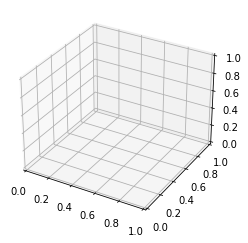

In [4]:
# In other to use the 3D plot, the objects should have a certain shape, so 
# The proper method to use is reshape and takes as arguements the dimensions

targets = targets.reshape(observations,)

# plotting according to the convertional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to  plot the dat from diferent angles .Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This mehod actually shows the plot.
plt.show()
targets = targets.reshape(observations,1)

In [ ]:
# Linear relationship in 2D isa straight line.
# Linear relationship in 3D is a plane(like in the graph)

##### Initializing the variables

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range, size=(2,1))

biases = np.random.uniform(-init_range,size=1)

print(weights)
print(biases)

[[ 0.00578878]
 [-0.03779326]]
[0.93875556]


### Set a learning rate

In [7]:
learning_rate = 0.02

Finally , we must asssign a learning rate which we denoted with eta earlier. This learning rate is useful for this demonstartion(nothing special about it)

For home work you can play around with it so as to see how eta works and how different learning rate effects the speed of optimization .

We are now set, we have inputs ,, targets and arbitrary numbers for weigth and biases.  What is left is to vary the weight and biases so that our output are closest to the target.


as we know by now,the problem boils down to minimizing the loss function with respect to weigth and biases and because this is a regression we use one last, the L2-norm function.

next, let's make our model learn

### Train the model

Since this is an iterative problem we must create a loop and alculate the loss function. We will use a fore loop with 100 iterations to complete this task.

Game plan for each iteration :

+ Calculate outputs 
At each iteration we will calculate the output 

+ compare outputs to the target through the loss function

+ Print the loss
We will print the loss for each iteration so we know how the algorithm is doing

+ Adjust the weigth and biases to get a better fit of the data

At the next iteration, this updated  weigth and biases will provide different output, then the procedure will be repeated.

The out put creation is done following the well known linear model creation.

The outputs are equal to the inputs times the weigth plus the biases.

Multiplying matrices requires the dot method. we will use the numpy one

np.dot(A,B) is a method used for multiplying matrices.
Alternatively, we can use the A.dot(B) to perform the same operation.
Now, the dot product of the input is 1000 X 2 * 2 X 1 so is a 100 X 1 matrix.

When we add the bias which is the csalar , python has the element wise.

This means it is added to each element of the output matrix 
Outputs = np.dot(inputs,weigths) + biases
  |                |      |          |
1000X1           1000X2  2X1       Scalar

For simplicity lets declar a variable called deltas which will recall the difference between the outputs and the targets.

We already introduced such variable in the gradient descent lecture.

deltas = output - targets

1000X1    1000X1   1000X1

This is useful as it is part of the update rule

Then we must calculate the loss, we said we will use the L2-norm loss.

Pythonically speaking, deltas is a 1000 X 1  array. We are interested in the sum of its terms  "sqaured", following the formula for the L2-norm loss.

Σi(yi-ti)2

There is a numpy method called sum which will allow us to sum all the variabless in the array.

np.sum(a) ia s method that allows us to sum  all the values in the array.

The L2- norm requires this values to be squared.
the code looks like this , then divide the whole expression by 2 to get the elegant update rule from the gradient descent.let's further augument the loss by dividing it by the number of observations we have. This will give us the average loss per observation or the mean loss. similarly, to the division by 2, this dooes not change the logic of the loss function. It is still lower than some accurate result will be obtained. this little improvement makes the learning independent of the number of observations.

" Division by a constant doesn't change the value of the loss as it is still lower for some more accurate result that will be obtained" 

loss = np.som(deltas**2 )/ 2 / observations.


Instead of adjusting the learning rate,we adjust the loss. That' valuable as thesame learning rate should give us similar results for both 1000 and 1 million observations.

We will print the loss as we obtained at each step, as we want to keep an eye on whether it is decreasing as iterations are performed .

If it is decreasing , our machine learning algorithm functions well.

Finally, we must update the weigth and biases so that they are ready for the next generation

Using thesame rescaliing tricks, i will also rescale the deltas.
This is yet another way to make the algorithm more universal so the new variable is 
deltas_scaled= deltas / observations

We will follow the gradient descent logic to update the weigth.

The new weigth = old weigth minus the learning rate times the dot products of the input and the deltas _ scaled

Let's update the weigths

wi + wi - η Σi xiδi

Note, that algebraically , dot product means sum of products

weigths= 
2X1


weigths - learning_rate * np.dot 
2X1          Scalar

(inputs,deltas_scaled)
1000 X2      100)X1

We cannot simply multiply the inputs and the deltas. This is an issue that may arise ocassionally due to the linear algebra involved.To fix it we must transpose the imput matirx using the object .T method

"inputs.T is a method used for transposing matrices"

Now the matrices are compatible

2 X 1000  X 1000 X 1 = 2 X 1


Weigths= 
2X1


weigths - learning_rate * np.dot 
2X1          Scalar

(inputs.T,deltas_scaled)
             2 X 1

Often when dealing with matrices, you find the correct way to code it through dimentionality check and Compability error, however, transposing matrices doesn't affect the information they hold, so we can do it freely

Dimentionality check :

print (weigths.shape, inputs.shape, deltas_scaled.shape


Compatibility error:


Now , let's update the biases, the new bias is equal to the old biases minus the learning rate times the sum of the deltas as explained in the gradient descent lecture.

bi + 1 = bi - η Σi δi

This is the entire algorithm

Let's recap what it does, 
first,it calculates the output for given weigth and biases

Second,it calculates the loss function that compares the output to the target

Third, it prints the loss so we can later analyze it.

Fourth, we upate the weigth and the biases following the gradient descent methodology.

When we run the code, what w get is a list of numbers that appears to be indescending order.

these are the values of our average loss function.

It started at a high value and at each iteration it became lower and lower until it reached the point where it almost stopped changing.

This means we have almost minimized the loss function with respect to the weigth and biases.

Therefore, we have found a linear function that fits the model well.

The weight and the biases are optimized so are the outputs. Since the optimization process has ended we can check these values.

Here we observe the values from the last iteration of the fore loop.

The one that gave us the lowest loss function,

In the memory of the computer, the weigth, biases and output variables are optimized as now.

"CONGRATULATIONS ! You have learnt how to create your first machine learning algorithm. 

In [8]:
#create a loop with 100 iteration
for i in range (100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    #deltas is 1000 x1 array
    loss=np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled=deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

215338.56893899842
2269638.4531803685
744009868.1644828
268533015371.95135
96947863401390.97
3.50008936253978e+16
1.2636302794373343e+19
4.562059186859486e+21
1.647031126357358e+24
5.9462436151719905e+26
2.1467604688912212e+29
7.750406490301115e+31
2.7981137921701427e+34
1.0101974398027474e+37
3.647095662226635e+39
1.3167036705250005e+42
4.753668991823308e+44
1.7162076319581002e+47
6.195990173185164e+49
2.2369259704553259e+52
8.075929201684294e+54
2.915636607202587e+57
1.052626467241303e+60
3.8002763334762693e+62
1.3720061826517964e+65
4.953326548000902e+67
1.7882896011232775e+70
6.4562262683374115e+72
2.3308784886848227e+75
8.415124103778848e+77
3.038095465969836e+80
1.0968375447014136e+83
3.959890704364619e+85
1.4296314405231282e+88
5.161369866798319e+90
1.8633990654364603e+93
6.727392468820232e+95
2.4287770810348935e+98
8.76856543854184e+100
3.1656976858999732e+103
1.1429055195805187e+106
4.126208994957355e+108
1.4896770011501852e+111
5.378151156346695e+113
1.9416631818965165e+116
7

###### Print weights and biases and see if we have worked correctly.

The weight seems about right , the bias is close to 5 as we want it but not really, this is because we used few iterations or inappropriate learning rate.

Let's re-run the code for the loop. this will continue optimizing the algorithm for another 100 iterations

The sought dependence was : 

t = F( xs, zs) = 2 * XS - 3* zs + 5 + noise


We can see that the bias improved when we increase the number of iterations increased.

We strongly encourage you to play around with the code for homework.Try different

 1) numbers of observations
 
 2) learning rate 
 
 3) number of iterations
 
 May be initial range for initializing the weight and biases 

In [9]:
print (weights,biases)

[[ 2.77451892e+124  2.77451892e+124  2.77451892e+124 ...  2.77451892e+124
   2.77451892e+124  2.77451892e+124]
 [-4.11888741e+124 -4.11888741e+124 -4.11888741e+124 ... -4.11888741e+124
  -4.11888741e+124 -4.11888741e+124]] [-2.54525111e+128]


#### plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy. The closer this plot is to a 45 degree line, the closer target and output values are.
Obviously,our model worked !

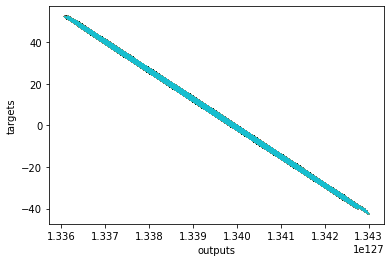

In [13]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

### Introduction to Tensorflow

#### TensorFlow 2 Intro

It is most widely used 
but very hard to use

kios was introduced 
tf 2.0 was introduced and it has the best
simplifies api
simple execution
it is an interface for tf
    

Installing the TensorFlow package

#### A note on coding in TensorFlow



Tensorflow is a deep learning library developed by google

Types of file formats in Tensorflow and data handling

Minimal example with Tensor flow

Tensor flow is tensor based
tensor flow can be represented by n-dimensional array.

npz files helps to organise data in a given way

In [ ]:
Model layout – inputs, outputs, target, weights, bias, optimizer, and loss

We must build the model
tf 2 is based on keras

linear combination + output = output layer

We must specify our output size

modl.compile

Stochaitic gradient descentloss function use l2-nirm loss or least sum of square


In [ ]:
You load your data from npz,s

verbose = o  you will not see any result but if you cahnge it to 1 ,you will see the result, if you change it to 2 
 when it is 2 we can track the last function
Use get weight to get the weigth

#### Customizing your model

The learning rate is an intergral part of the optimizer

#### Neural Networks (Tensor Flow): Quiz

1. What two types of Neural Networks are there

Biological Neural network and Artificial Neural Network


2.  What are ANNs used for?

Reproduce Human Brain Functions

3. What are the Three Parts of a Neuron?

Dendrite, Soma, Axon

ANNs are efficient data-driven modelling tools widely used for nonlinear systems dynamic modelling and identification, due to their universal approximation capabilities and flexible structure that allow to captu

4. What Problems do ANNs not solve?

Geometric problems

5. What futuristic actions can not be performed by ANNs?

Function Approximation

6. The best type of ANN is one that is built for a specific purpose and not a general purpose. 
true

7. What 2 subjects are neural networks usually associated with?

Biology & Artificial-engineering

8. Which of the following is/are true for neural networks

The training time depends on the size of the network.

Neural networks can be simulated on a conventional computer.

9. What is/are the advantages of neural networks over conventional computers?


They have the ability to learn by example
They are more fault tolerant
They are more suited for real time operation due to their high 'computational' rates

10. What is an activation value?

weighted sum of inputs

In [ ]:
#### THe layer

You can combine lineear and non linear function

non linearity is sigmoid function

Input layer  : is our first layer
    
output layer is the last layer
is what we compare our output to.

Hidden layers are the hidden units or nodes
the weighrt is the number of the hidden units
we know the input but we dont know what is inside
Hypaparemeters are set by us before we start optimizing.
parameters are derived through optimazation
The weight is done with the same weigth

Depth and weigth and learning rate 
are hyper parameters and they  are set by us before we start optimizing.

Input layer  : is our first layer
    
output layer is the last layer
is what we compare our output to.

Hidden layers are the hidden units or nodes
the weighrt is the number of the hidden units
we know the input but we dont know what is inside
Hypaparemeters are set by us before we start optimizing.
parameters are derived through optimazation
The weight is done with the same weigth

Depth and weigth and learning rate 
are hyper parameters and they  are set by us before we start optimizing.

An illustration of deep net

input layers data  each circle reprens the data we feed to train the model we feed the model we have 8 e.g weather forecast e.g humidty , high and low temperature, ave temp, invusbibilty and distanceprecipitation, clouud cover

To combine linearity we need weigth.
weight are 8x9 matrix
a vector of 8x9

each error reps the mathematicaly expression 
erors represents weigths
weigth is a part of the hidden layer
non linearity does not change the shape of the experiession , it only changes its linearity.

weigth has two index numbers

units it refers to and ghidden units is referring to.

hiden units and combine the non linearity

we can add a 100 hidden layer

we will reach the output layer. we decide the number of output we wan to reach ie humidty, temp, distance  etc